R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

# Table Of Contents
  1. [Preparing Data](#Preparing-Data) 
  2. [Visulazation](#Visulazation)
  3. [Transformations and adjustments](#Decompistion)
  4. [Specifing Models](#Specifing-Models)
  
  5. [5.4 Residual and onwards]

In [1]:
install.packages("latex2exp")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [7]:
#Dont run this unless you need Prophet
install.packages("fable.prophet")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘zoo’, ‘inline’, ‘loo’, ‘progressr’, ‘anytime’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘xts’, ‘BH’, ‘RcppEigen’, ‘numDeriv’, ‘fabletools’, ‘tsibble’, ‘prophet’, ‘distributional’




In [2]:
install.packages("fpp3")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’, ‘urca’




In [3]:
library(fpp3)
library(latex2exp)
library(ggplot2) 
library(dplyr)
library(fable.prophet)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.6     ✔ tsibble     1.1.1
✔ dplyr       1.0.7     ✔ tsibbledata 0.4.0
✔ tidyr       1.1.4     ✔ feasts      0.2.2
✔ lubridate   1.8.0     ✔ fable       0.3.1
✔ ggplot2     3.3.5     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



ERROR: Error in library(fable.prophet): there is no package called ‘fable.prophet’


# Preparing Data

In [4]:
#Load Data
Chips <- tibble(
  Month = c("2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun","2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr","2020 May","2020 Jun","2020 Jul","2020 Aug","2020 Sep","2020 Oct","2020 Nov","2020 Dec","2021 Jan","2021 Feb","2021 Mar","2021 Apr","2021 May","2021 Jun","2021 Jul","2021 Aug","2021 Sep","2021 Oct","2021 Nov","2021 Dec","2022 Jan","2022 Feb","2022 Mar","2022 Apr","2022 May","2022 Jun","2022 Jul","2022 Aug","2022 Sep","2022 Oct","2022 Nov","2022 Dec"), 
  Observation = c(1296,1112,1129,979,752,676,748,998,1299,1727,1992,1999,1700,1518,1508,1208,1157,915,1284,1494,1773,2135,2201,2195,1662,1305,1389,1164,908,1116,1471,1527,1771,1952,2005,2144,1837,1655,1692,1387,1351,1521,1694,1667,2034,2255,2342,2502)
)

In [5]:
head(Chips)

Month,Observation
<chr>,<dbl>
2019 Jan,1296
2019 Feb,1112
2019 Mar,1129
2019 Apr,979
2019 May,752
2019 Jun,676


In [6]:
#This can be converted to a tsibble object using the following code:

Chips <- Chips |>
  mutate(Month = yearmonth(Month)) |>
  as_tsibble(index = Month)

In [7]:
head(Chips)

Month,Observation
<mth>,<dbl>
2019 Jan,1296
2019 Feb,1112
2019 Mar,1129
2019 Apr,979
2019 May,752
2019 Jun,676


## Filter 4 Training Data

In [8]:
Chips_train <- Chips %>%
  filter(Month >= yearmonth("2019-01") & Month <= yearmonth("2022-02"))

Chips_Test <- Chips %>%
  filter(Month >= yearmonth("2022-03") & Month <= yearmonth("2022-12"))

In [9]:
Chips_Test

Month,Observation
<mth>,<dbl>
2022 Mar,1692
2022 Apr,1387
2022 May,1351
2022 Jun,1521
2022 Jul,1694
2022 Aug,1667
2022 Sep,2034
2022 Oct,2255
2022 Nov,2342


# Visulazation

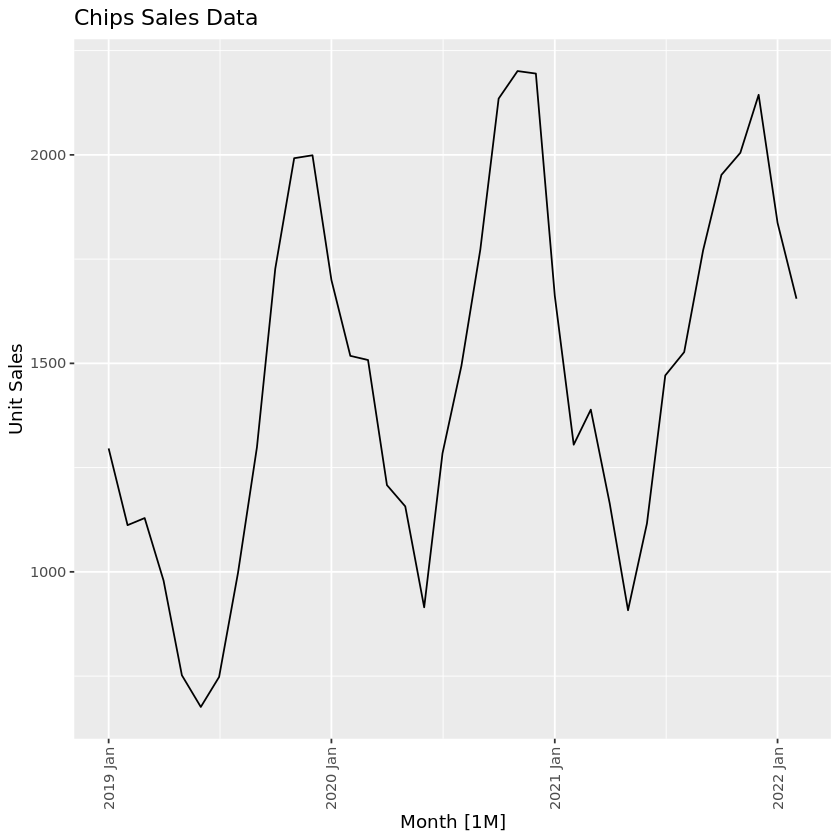

In [15]:
autoplot(Chips_train, Observation)+
  labs(y = "Unit Sales",
      title = "Chips Sales Data")+
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5))
      

### Insights:
    1- There is an upward trend.
    2- There is a season pattern every december, due to Schools or End of year sales
    3- There is a drop every June and May.
    4- 2021 December peak growth is less than the prevoues year. 

## Seasonal plots


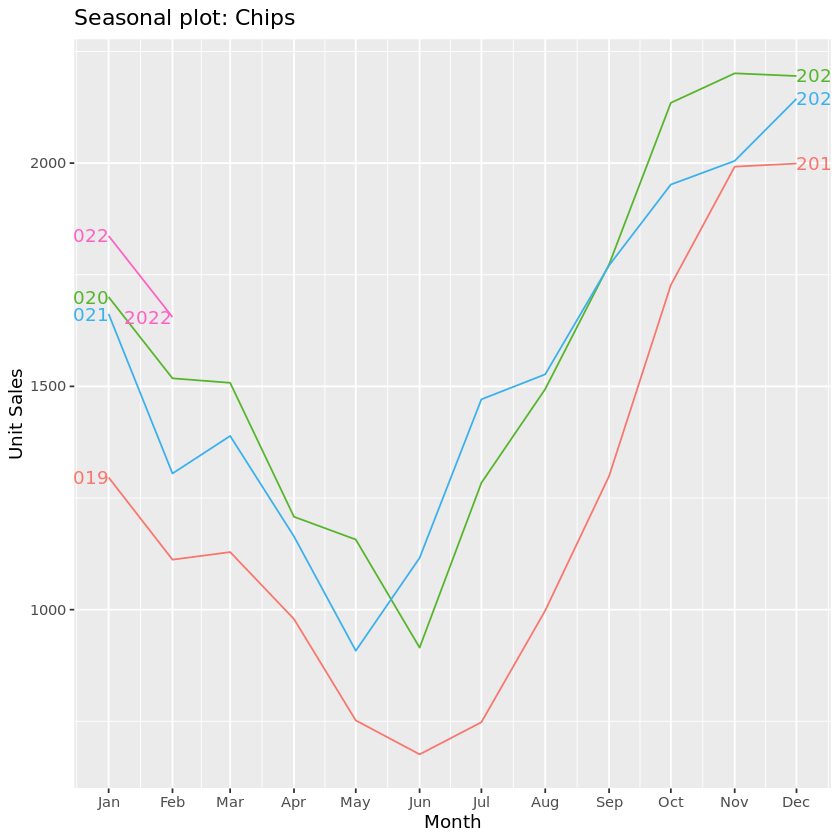

In [16]:
Chips_train |>
  gg_season(Observation, labels = "both") +
  labs(y = "Unit Sales",
       title = "Seasonal plot: Chips")

### Insights: Ramzan, Holidays, School
    1- Year 2021 is worse than 2020, due to tax increment in July 2020, Main reason 2020 is acctully worse than 2021 but it got better due to online and corona increased demand.
    2- The drop in June shifted to May in 2020 and 2021
    3- The sales between Feb and MAr got a litter better than the 2 years before
    4- only year 2022 has a drop in Aug
    
    5- From before: There is a season pattern every december

### Subseries

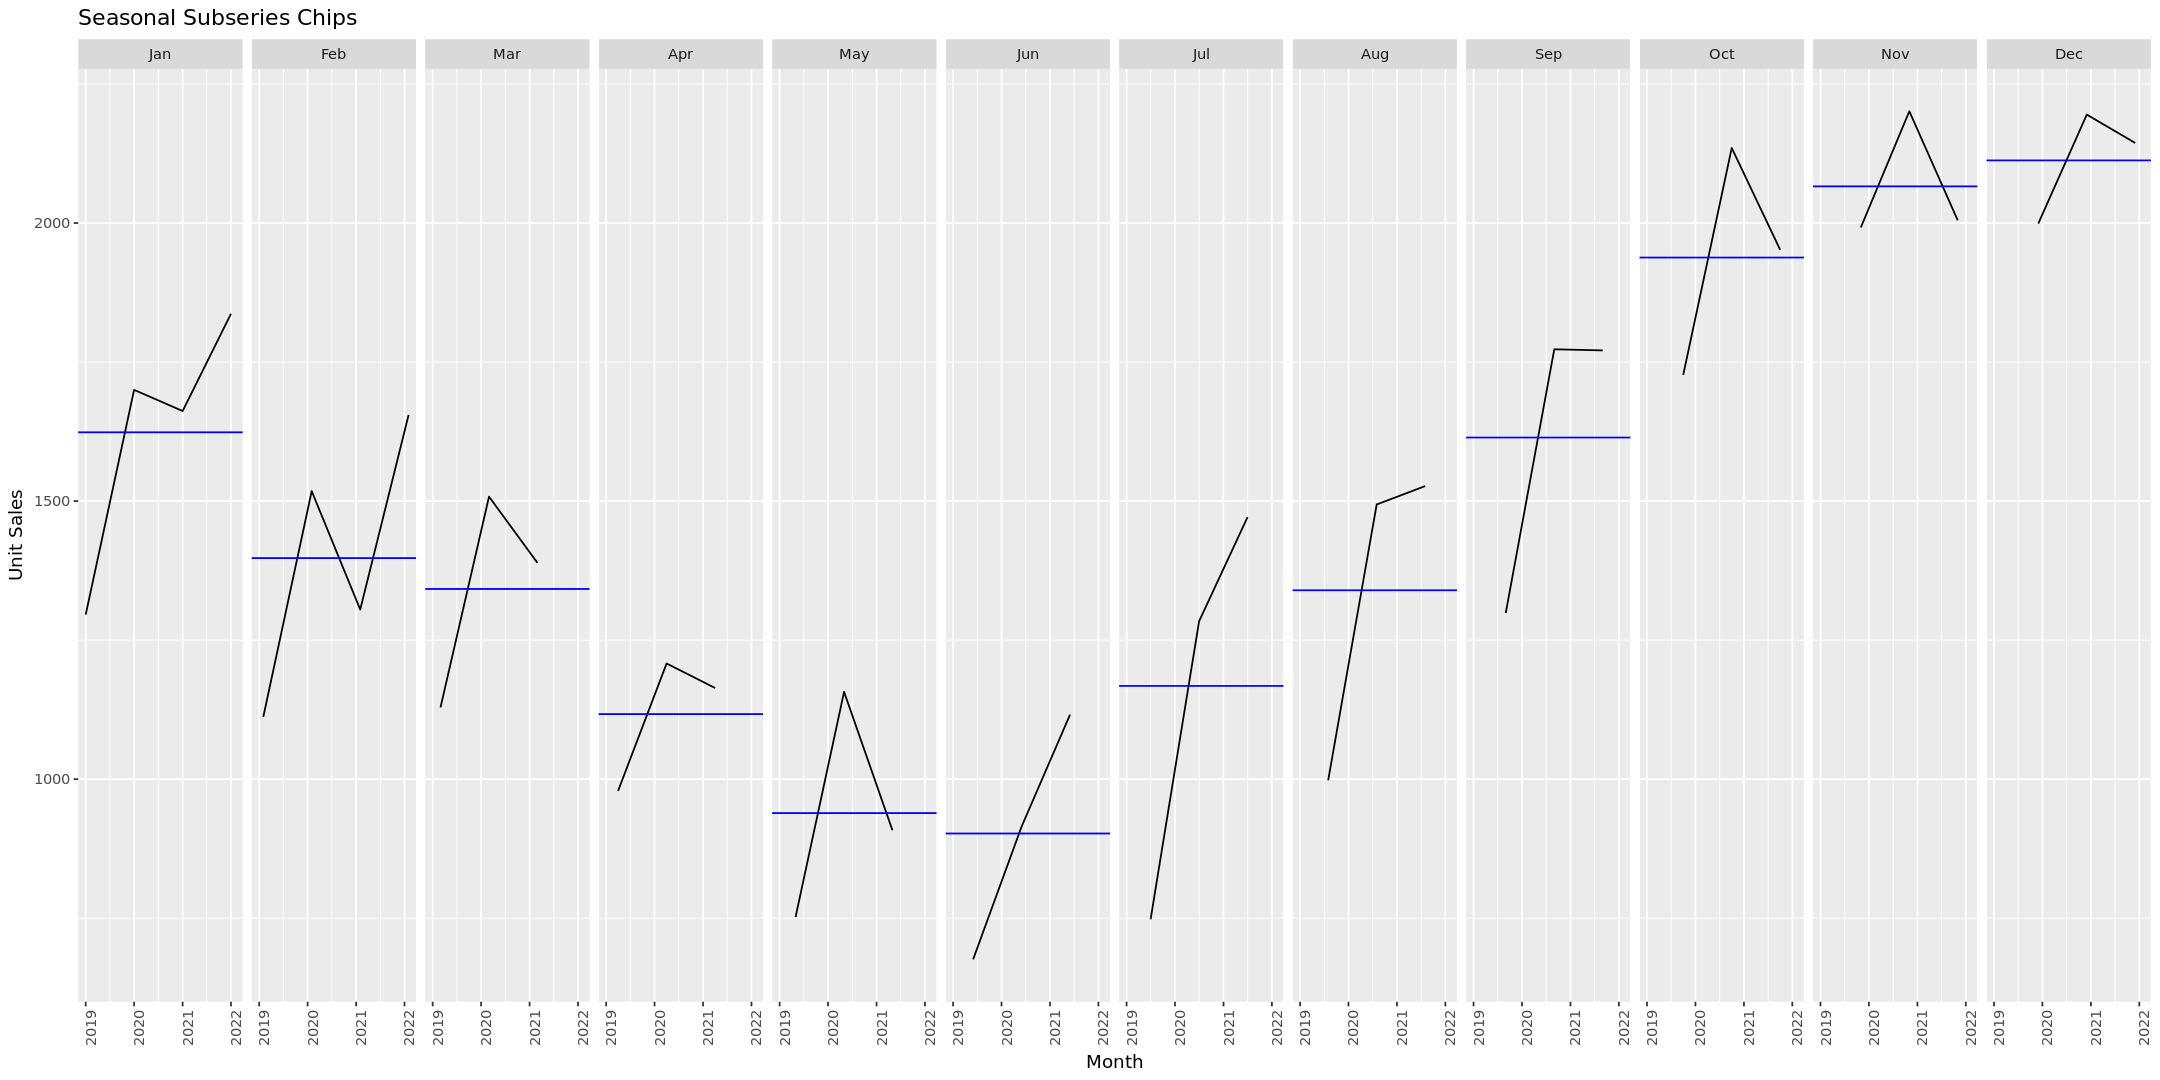

In [17]:
options(
  repr.plot.width = 18,   # Set the width in inches
  repr.plot.height = 9  # Set the height in inches
)

Chips_train |>
  gg_subseries(Observation) +
  labs(
    y = "Unit Sales",
    title = "Seasonal Subseries Chips"
  )

### Insights:
    1- 2021 Was below the erlier year in Jan-May and Sep-Oct 
    2- There are drop spikes where the 2021 is belwo the mean in FEb, may and nov


### Lag Plot (Self Corrlation)
Each graph shows yt plotted against  yt−k for different values of k.
Top left plot shows Dec against Nov

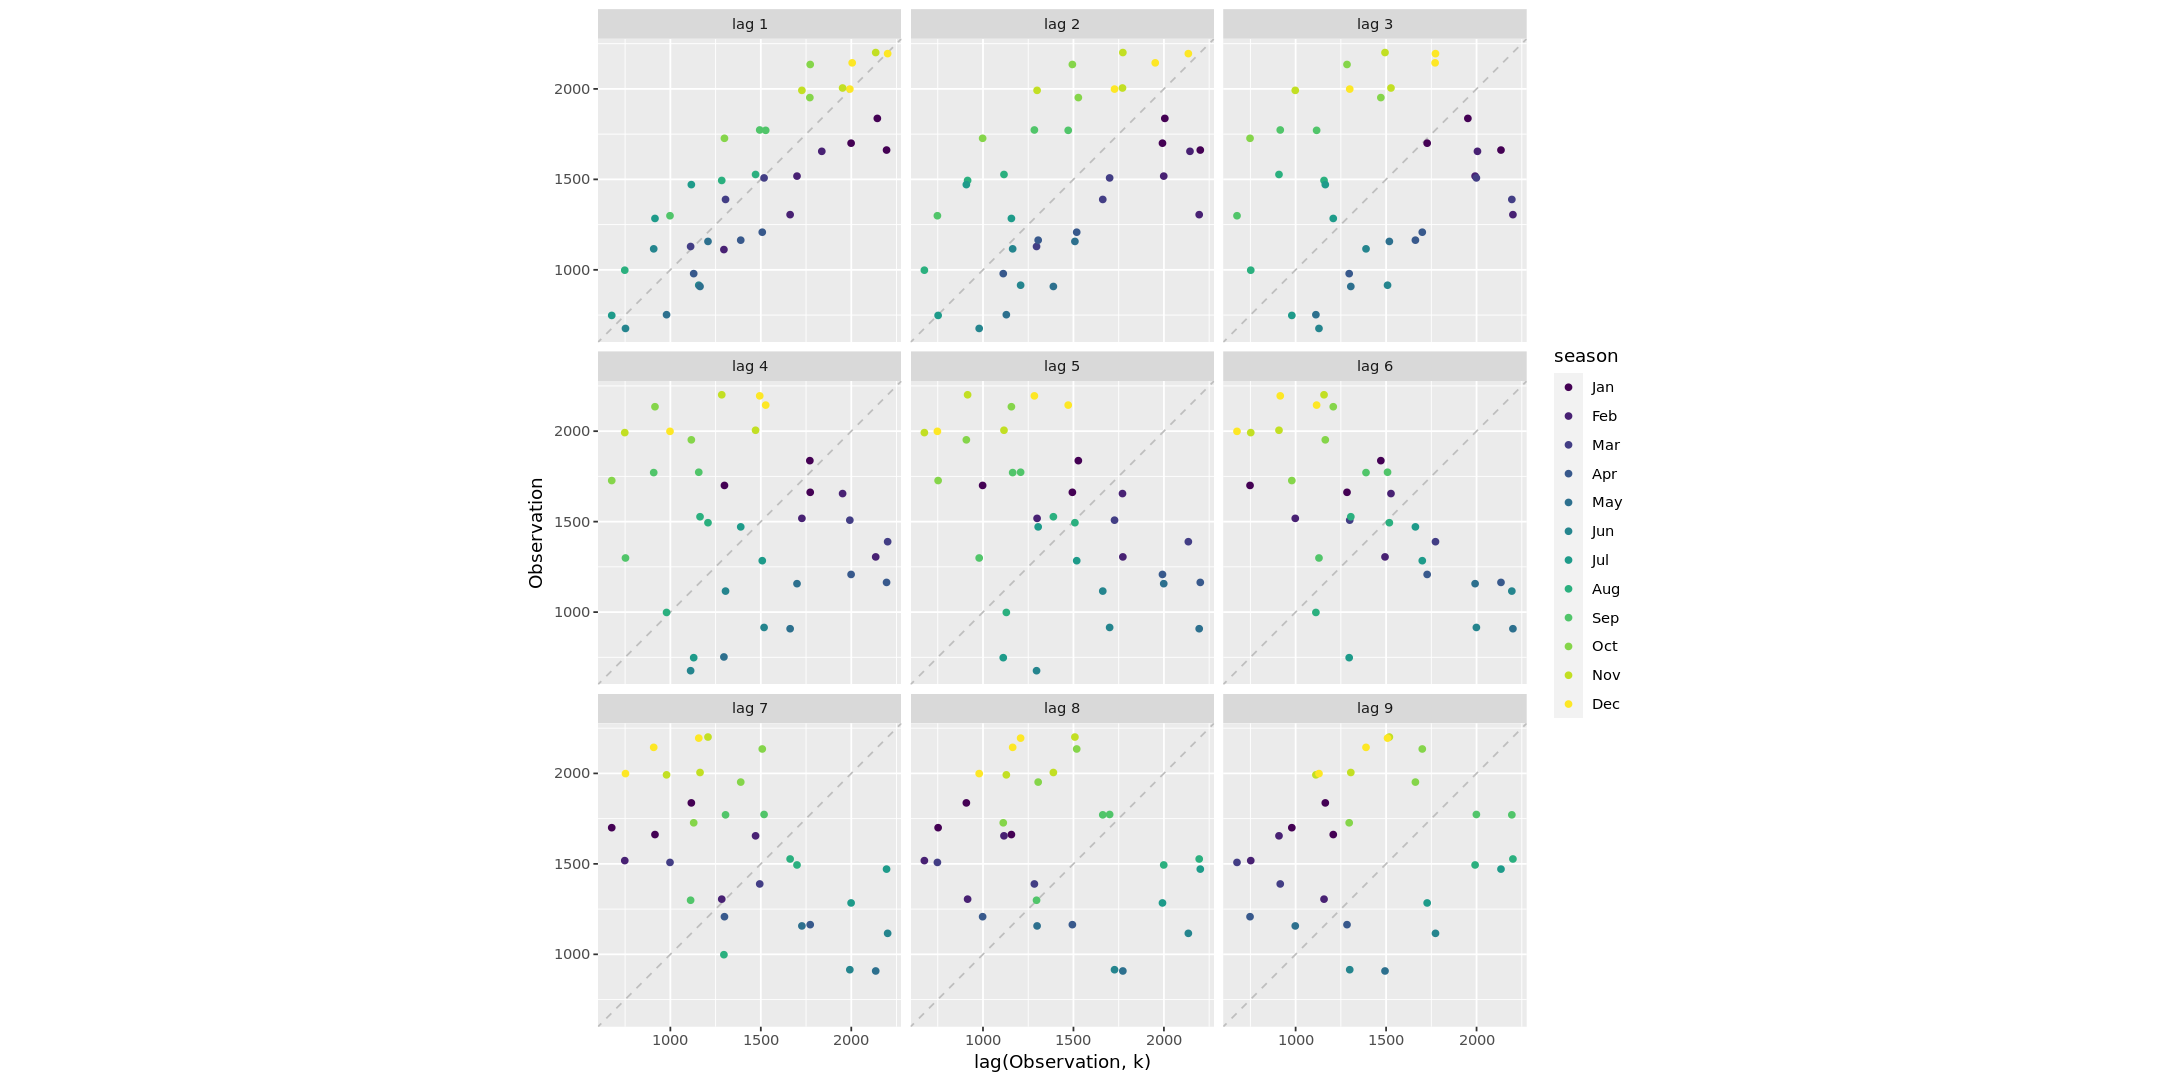

In [18]:
options(
  repr.plot.width = 18,   # Set the width in inches
  repr.plot.height = 9  # Set the height in inches
)

Chips_train |>
  gg_lag(Observation, geom = "point") +
  labs(x = "lag(Observation, k)")

### Insights:
    1- Lag 1 shows a postive relationship. because monthly sales data are closer to the last month sales.
    2- Lag 6 shows a negative relationship. Thats expected due to peaks and drops every 6 months


### AutoCorrelation (Correlogram) - White Noise Test
more quantifed visu of the upper graph

The dashed blue lines indicate whether the correlations are significantly different from zero

Time series that show no autocorrelation are called white noise, For a white noise series, we expect 95% of the spikes in the ACF to lie within  ±2/√T where T is the length of the time series. these bounds on a graph of the ACF (the blue dashed lines)

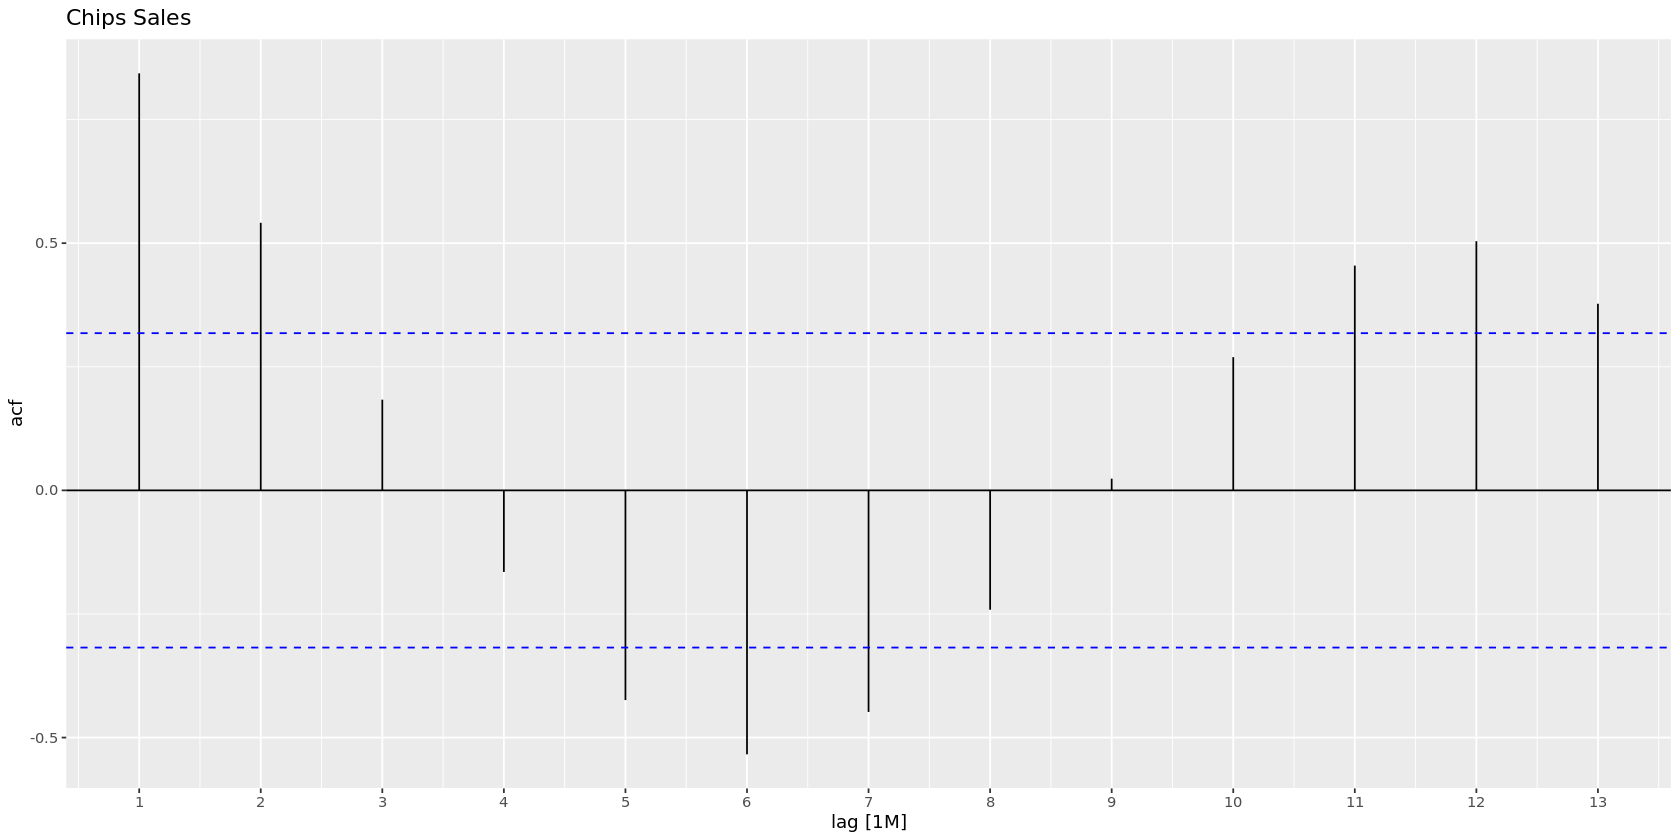

In [19]:
options(
  repr.plot.width = 14,   # Set the width in inches
  repr.plot.height = 7  # Set the height in inches
)


Chips_train |>
  ACF(Observation, lag_max= 13) |>
  autoplot() +
  scale_x_continuous(breaks = seq(1, 18)) +
  labs(title = "Chips Sales")

#### Insights:
The correlation here is quaintfied and its clearer than the previous plots that:

if sales are rising in one month there's a high probability they all rise for two months a slightly smaller chance they'll rise for three month

    1- r1 shows a strong postive relationship. because monthly sales data are closer to the last month sales.
    2- r2 shows a med postive relationship.
    3- r5 shows a med negative relationship. becasue you are drawing peaks agains drops
    4- r6 shows a negative relationship. Thats expected due to peaks and drops every 6 months
    5- r7 shows a med negative relationship.
    6- r11 shows a med postive relationship.
    7- r12 shows a strong postive relationship. due to seasonalty effect at the end of each year
    


## Decompistion

### Log Transformation

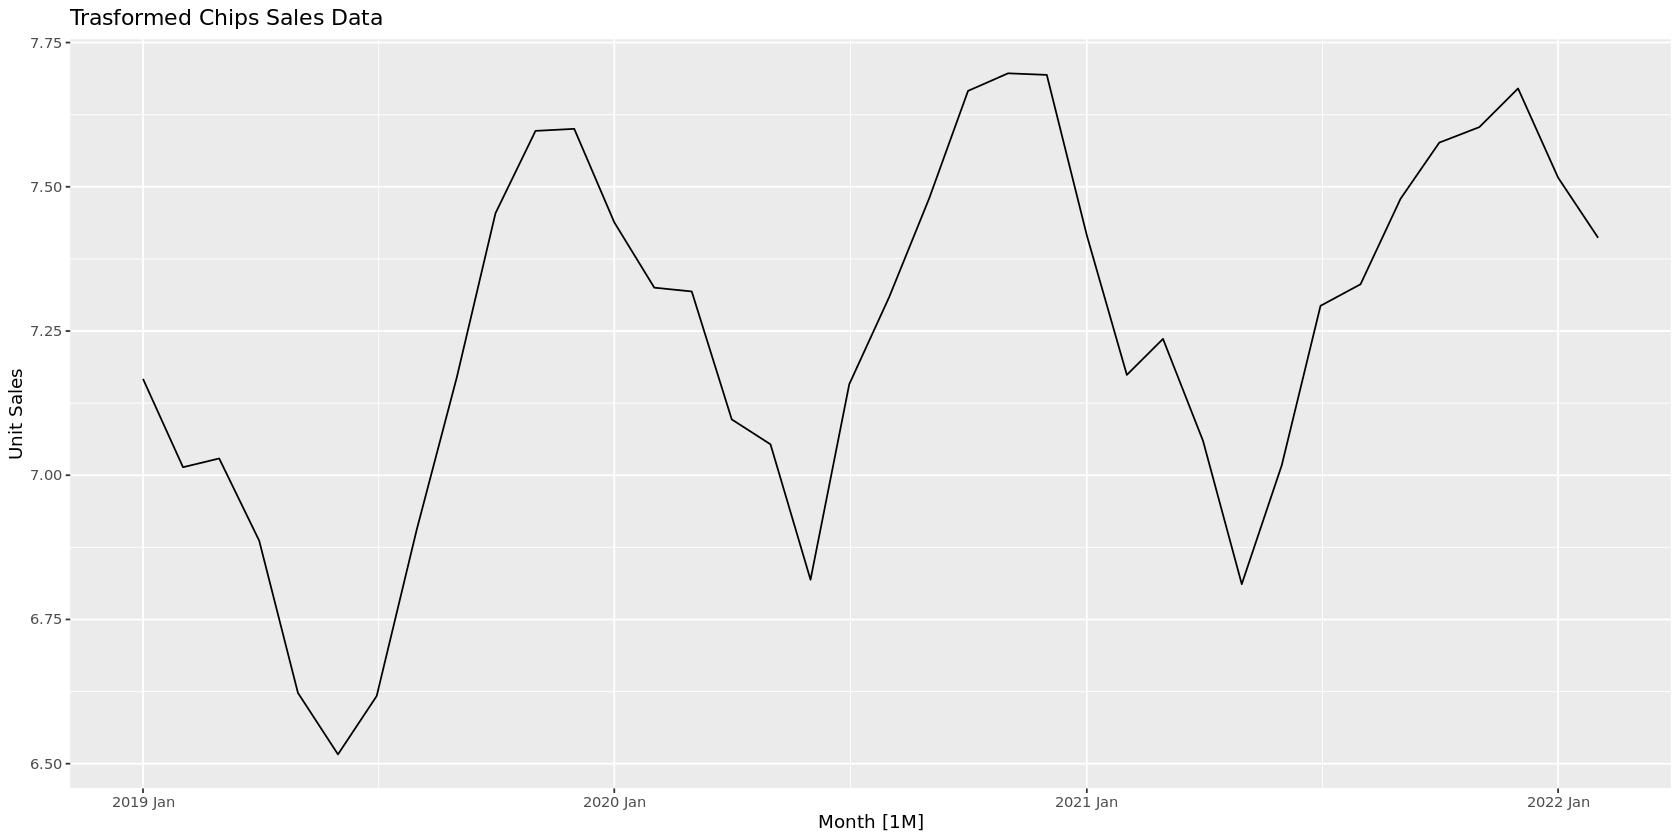

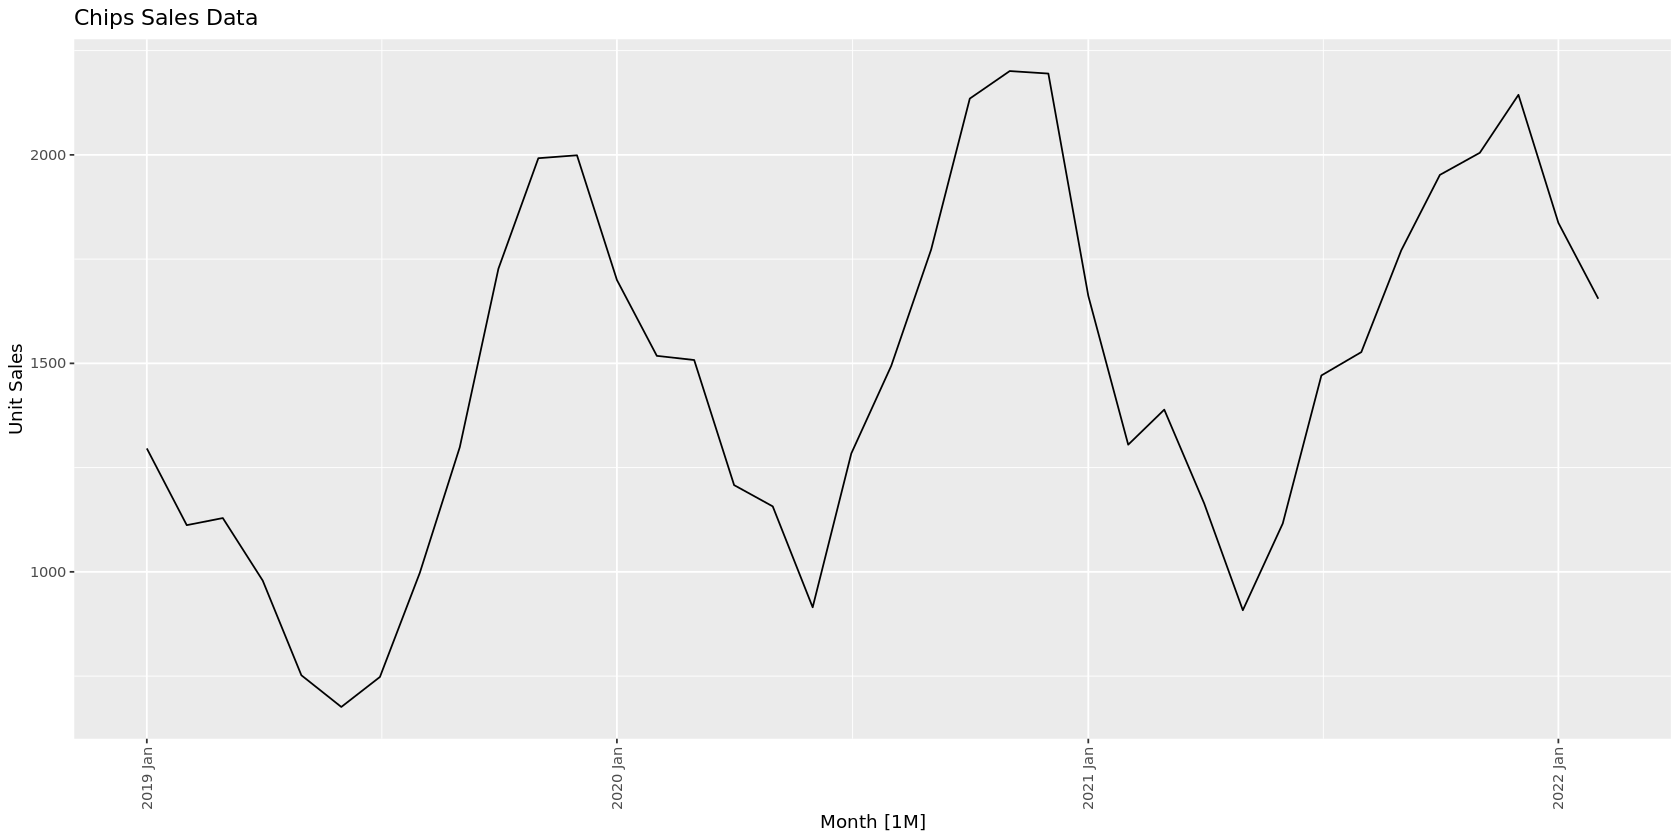

In [20]:
Chips_train |>
  autoplot(log(Observation))+
  labs(y = "Unit Sales",
      title = "Trasformed Chips Sales Data")

autoplot(Chips_train, Observation)+
  labs(y = "Unit Sales",
      title = "Chips Sales Data")+
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

### STL: Seasonal and Trend decomposition using Loess

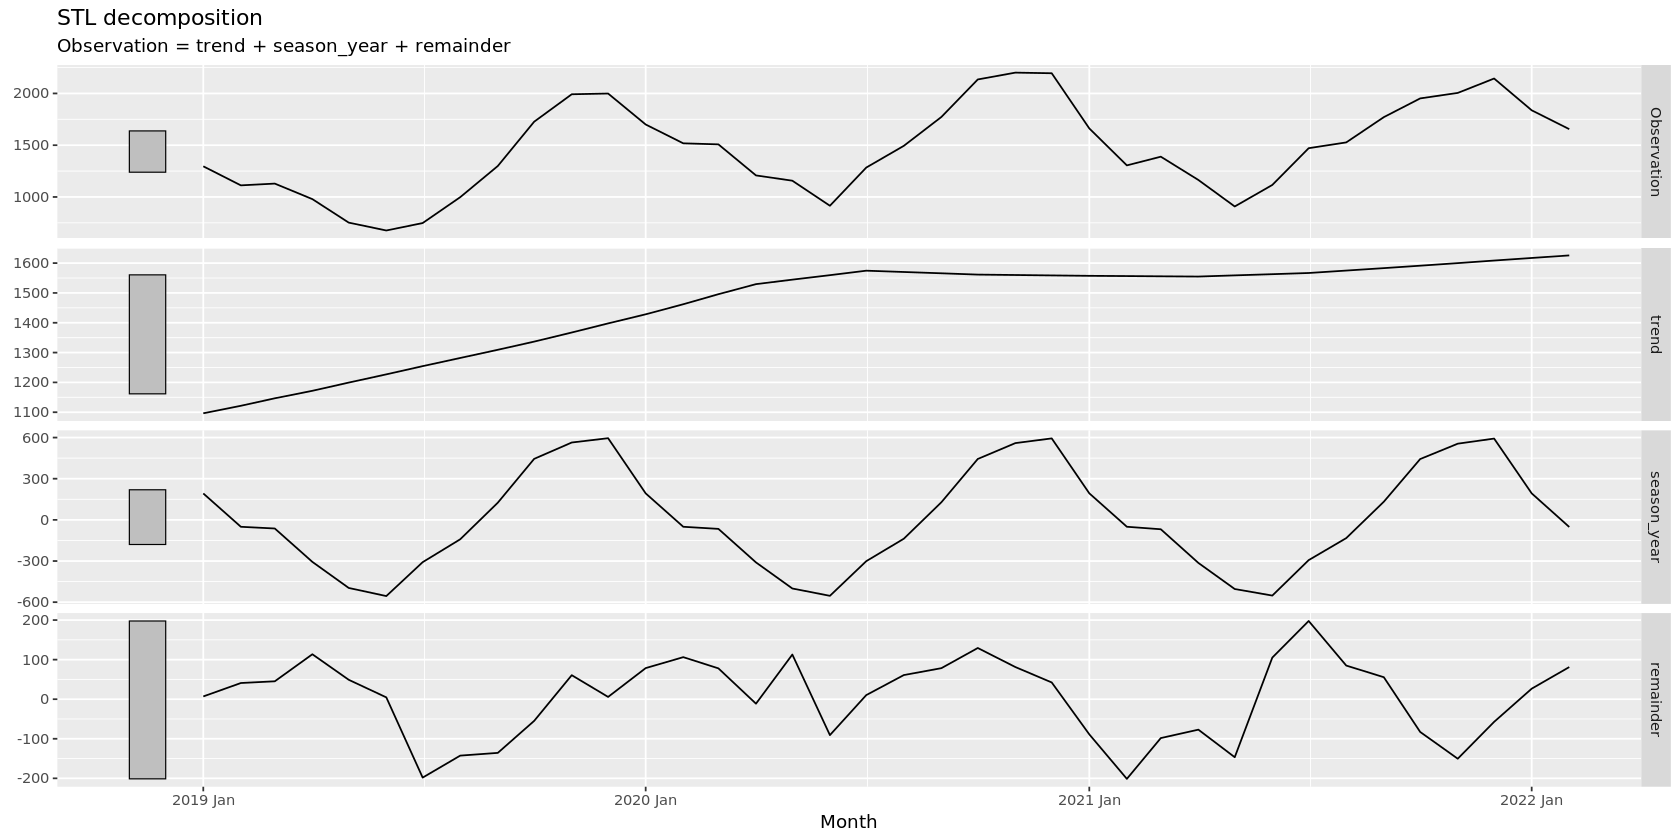

In [21]:
dcmp <- Chips_train |>
  model(stl = STL(Observation))

components(dcmp) |> autoplot()

#### Insights:

    1- Gray bars shows the scale of each graph.
    2- The seasonal pattern does not change overtime.

In [16]:
#This plot is used when sesonality is not of intrest
options(
  repr.plot.width = 7,   # Set the width in inches
  repr.plot.height = 7  # Set the height in inches
)

components(dcmp) |>
  as_tsibble() |>
  autoplot(Observation, colour = "gray") +
  geom_line(aes(y=season_adjust), colour = "#0072B2") +
 #geom_line(aes(y=trend), colour = "#D55E00") +
  labs(y = "Unit Sales",
       title = "Chips Sales Data")

ERROR: Error in components(dcmp): object 'dcmp' not found


### Benchmark

Plot variable not specified, automatically selected `.vars = Observation`



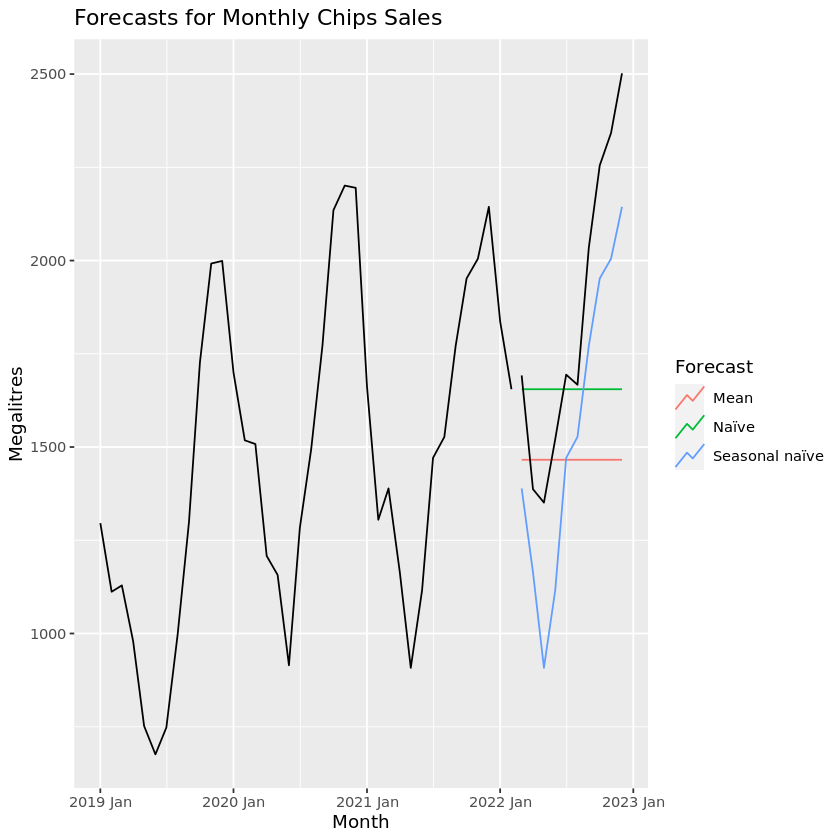

In [32]:
# Fit the models
Chips_fit <- Chips_train |>
  model(
    Mean = MEAN(Observation),
    `Naïve` = NAIVE(Observation),
    `Seasonal naïve` = SNAIVE(Observation)
  )
# Generate forecasts for 10 Months
Chips_fc <- Chips_fit |> forecast(h = 10)
# Plot forecasts against actual values
Chips_fc |>
  autoplot(Chips_train, level = NULL) +
  autolayer(Chips_Test,
    colour = "black"
  ) +
  labs(
    y = "Megalitres",
    title = "Forecasts for Monthly Chips Sales"
  ) +
  guides(colour = guide_legend(title = "Forecast"))

# Specifing Models

## Nueral Network

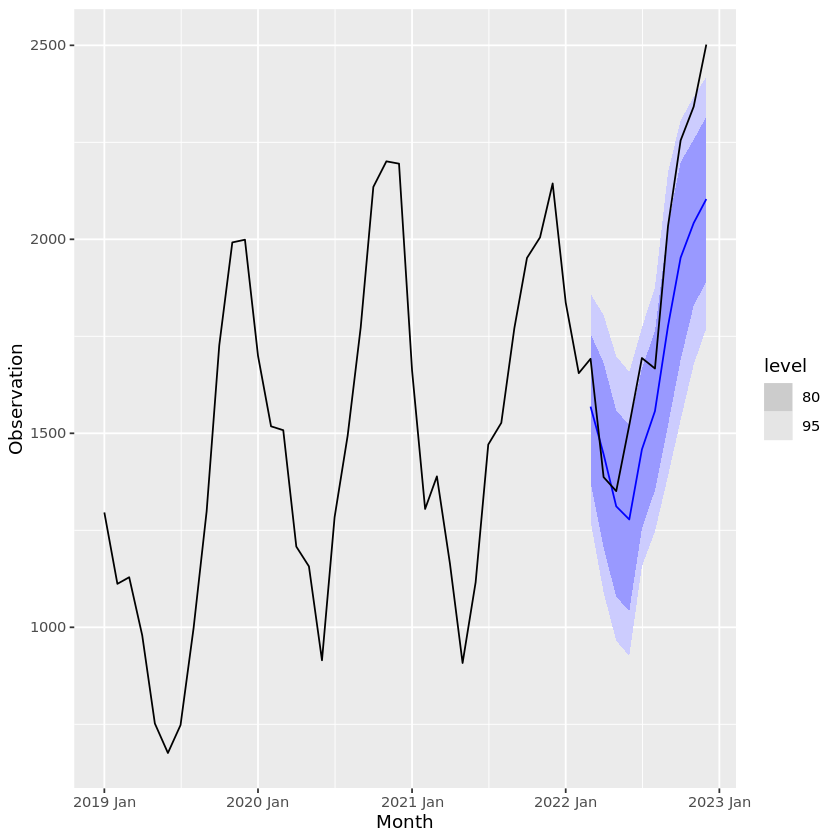

In [68]:
fit <- Chips_train |>
  model(NNETAR(Observation))

fc <- fit |> forecast(h = 10)
fc |> autoplot(Chips)

## Prophet

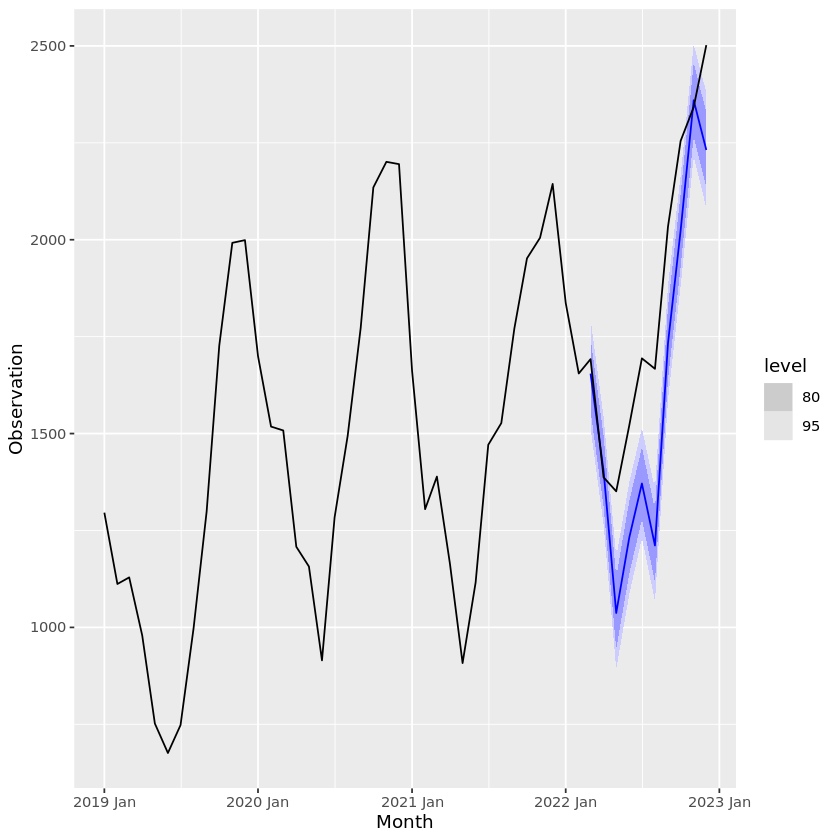

In [51]:
library(fable.prophet)

fit <- Chips_train |>
  model(
    prophet = prophet(Observation ~ season(period = 6, order = 10, type = "additive"
                                    ))
  )

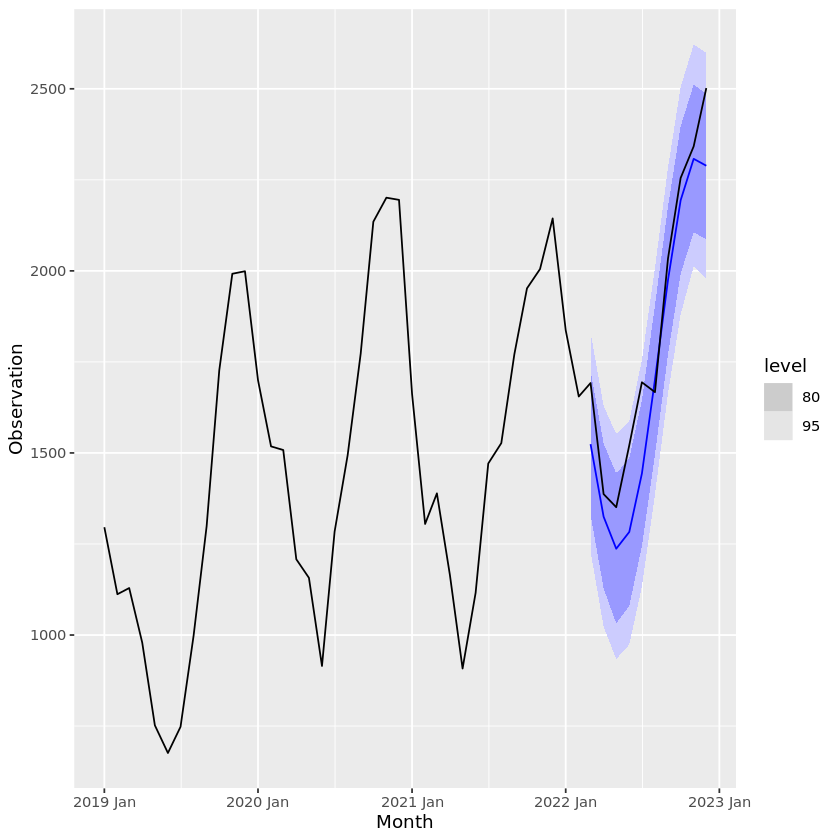

In [66]:
# Order number change
library(fable.prophet)
fit <- Chips_train |>
  model(
    prophet = prophet(Observation ~ season(period = "year", order = 1, type = "additive"
                                    ))
  )
fc <- fit |> forecast(h = 10)
fc |> autoplot(Chips)

### Regression Model Using Seosnal Dummies

In [38]:
fit_Chips <- Chips_train |>
  model(TSLM(Observation ~ trend() + season()))
report(fit_Chips)

Series: Observation 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-264.717 -104.794    7.192  110.000  218.000 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1378.413     91.977  14.987 5.35e-14 ***
trend()          12.913      2.423   5.329 1.59e-05 ***
season()year2  -239.163    112.635  -2.123 0.043801 *  
season()year3  -230.100    122.017  -1.886 0.070993 .  
season()year4  -468.013    121.849  -3.841 0.000745 ***
season()year5  -658.925    121.728  -5.413 1.28e-05 ***
season()year6  -708.504    121.656  -5.824 4.50e-06 ***
season()year7  -456.083    121.632  -3.750 0.000939 ***
season()year8  -296.996    121.656  -2.441 0.022055 *  
season()year9   -35.242    121.728  -0.290 0.774578    
season()year10  275.512    121.849   2.261 0.032707 *  
season()year11  390.600    122.017   3.201 0.003705 ** 
season()year12  424.354    122.234   3.472 0.001895 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

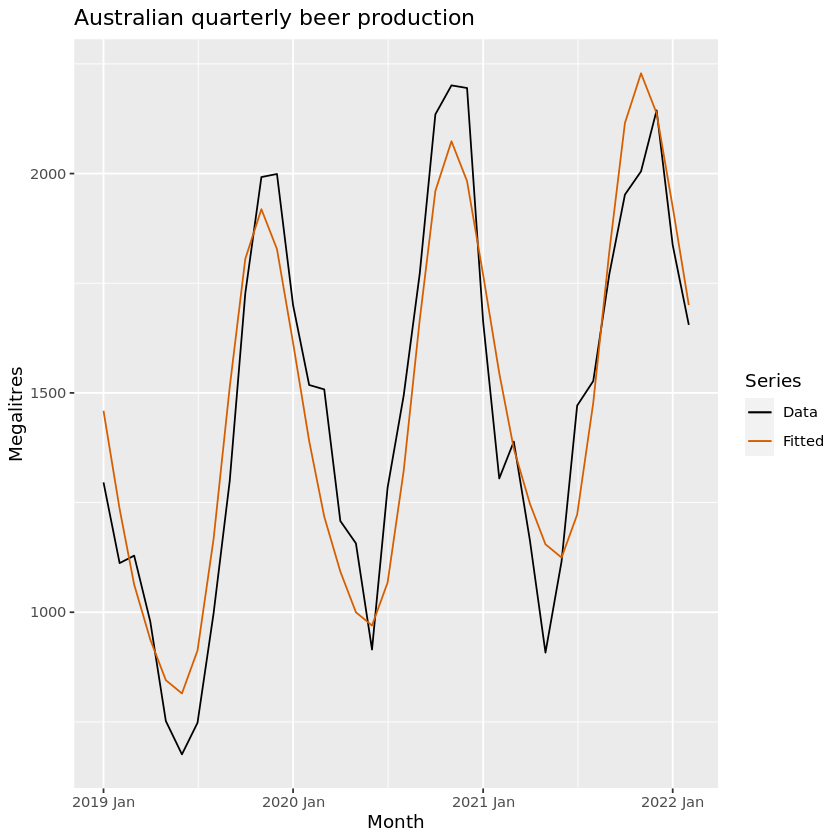

In [14]:
augment(fit_Chips) |>
  ggplot(aes(x = Month)) +
  geom_line(aes(y = Observation, colour = "Data")) +
  geom_line(aes(y = .fitted, colour = "Fitted")) +
  scale_colour_manual(
    values = c(Data = "black", Fitted = "#D55E00")
  ) +
  labs(y = "Megalitres",
       title = "Australian quarterly beer production") +
  guides(colour = guide_legend(title = "Series"))

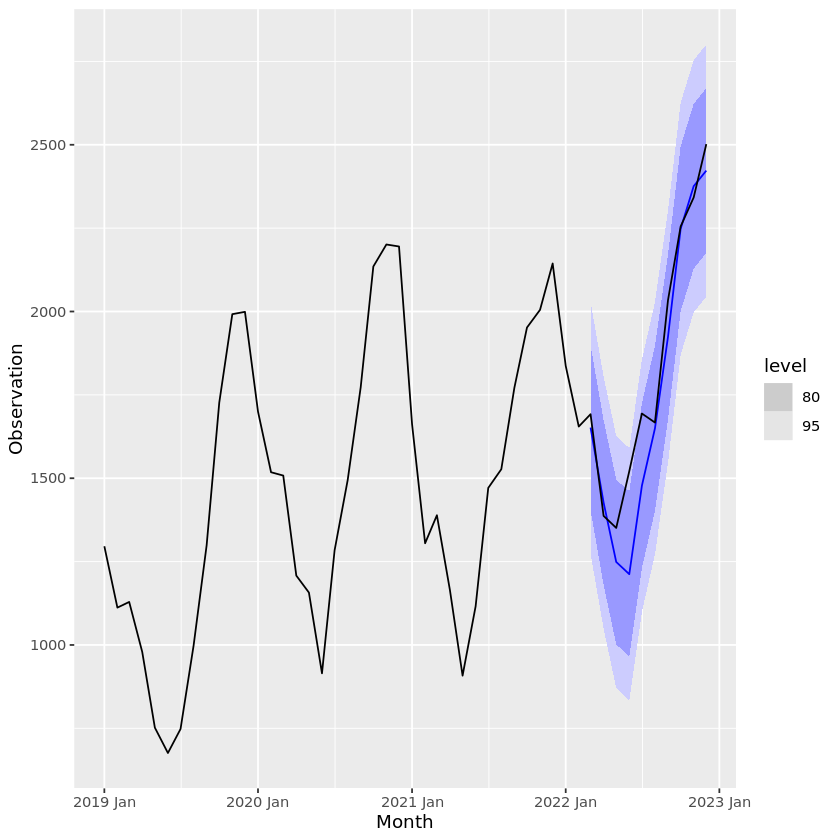

In [39]:
fc <- fit_Chips |> forecast(h = 10)
fc |> autoplot(Chips)